# Install packages

# Import packages

In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import os
if Path.cwd().parts[-1] != 'Multifirefly-Project':
    if Path.cwd().parts[-1] != 'notebooks':
        os.chdir('..')
    from add_path import find_path
    current_path = find_path()
    os.chdir(current_path)
import sys


from data_wrangling import specific_utils, process_monkey_information, base_processing_class, combine_info_utils
from pattern_discovery import pattern_by_trials, pattern_by_points, make_ff_dataframe, ff_dataframe_utils, pattern_by_trials, pattern_by_points, cluster_analysis, organize_patterns_and_features, category_class, cluster_analysis
from decision_making_analysis.decision_making import decision_making_class, decision_making_utils, plot_decision_making, intended_targets_classes
from decision_making_analysis.GUAT import GUAT_helper_class, GUAT_collect_info_class, GUAT_combine_info_class, process_GUAT_trials_class, GUAT_and_TAFT
from decision_making_analysis import free_selection, replacement, trajectory_info
from null_behaviors import show_null_trajectory, find_best_arc, curvature_utils, curvature_class, curv_of_traj_utils
from machine_learning.ml_methods import regression_utils, classification_utils, prep_ml_data_utils, hyperparam_tuning_class
from machine_learning.RL.env_related import env_for_lstm, env_utils, base_env, collect_agent_data_utils
from machine_learning.RL.lstm import GRU_functions, LSTM_functions
from machine_learning.RL.SB3 import interpret_neural_network, sb3_for_multiff_class, rl_for_multiff_utils, SB3_functions
from visualization.matplotlib_tools import plot_trials, plot_polar, additional_plots, plot_behaviors_utils, plot_statistics, monkey_heading_functions
from visualization.animation import animation_func, animation_utils, animation_class
from planning_analysis.test_params_for_planning import params_test_combos_class, params_utils
from visualization.plotly_tools import plotly_for_monkey, plotly_for_scatterplot, plotly_preparation, plotly_for_correlation
from visualization.dash_tools import dash_prep_class, dash_utils, dash_utils, dash_comparison_class, dash_params_class
from visualization.dash_tools.dash_main_class_methods import dash_main_class
from neural_data_analysis.neural_analysis_tools.get_neural_data import neural_data_processing
from neural_data_analysis.neural_analysis_tools.visualize_neural_data import plot_neural_data, plot_modeling_result
from neural_data_analysis.neural_analysis_tools.model_neural_data import transform_vars, neural_data_modeling, drop_high_corr_vars, drop_high_vif_vars
from neural_data_analysis.neural_analysis_by_topic.neural_vs_behavioral import prep_monkey_data, prep_target_data, neural_vs_behavioral_class
from neural_data_analysis.neural_analysis_by_topic.planning_and_neural import planning_neural_class, planning_neural_utils
from planning_analysis.plan_factors import plan_factors_utils, build_factor_comp, plan_factors_class, monkey_plan_factors_x_sess_class
from planning_analysis.show_planning import nxt_ff_utils, show_planning_class, show_planning_utils
from planning_analysis.show_planning.get_stops_near_ff import find_stops_near_ff_class, find_stops_near_ff_utils, plot_stops_near_ff_class, plot_stops_near_ff_utils, plot_monkey_heading_helper_class, stops_near_ff_based_on_ref_class

from importlib import reload
from eye_position_analysis import eye_positions
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from os.path import exists
import seaborn as sns
import math
import copy
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm
import itertools
import plotly.express as px
import gc
from scipy.stats import rankdata
from scipy import stats
from IPython.display import HTML
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, hamming_loss, multilabel_confusion_matrix, fbeta_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, VotingClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from math import pi
from scipy.ndimage import gaussian_filter1d
from statsmodels.graphics.tsaplots import plot_acf
import warnings
import os, sys
from sklearn.exceptions import ConvergenceWarning
import plotly.graph_objects as go

plt.rcParams["animation.html"] = "html5"
os.environ['KMP_DUPLICATE_LIB_OK']='True'
rc('animation', html='jshtml')
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams['animation.embed_limit'] = 2**128
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True)
pd.options.display.max_rows = 101

Changed the directory to 'Multifirefly-Project'.
Added /Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/methods to the path.


In [2]:
data_item = None
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0328"

# SNF (stops near ff) class

## run class

Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Retrieved ff_dataframe from all_monkey_data/processed_data/monkey_Bruno/data_0328/ff_dataframe.h5
Removed 0 rows out of 728 rows where cur_ff was not visible bbas or nxt_ff was not visible both bbas and bsans
shared_stops_near_ff_df has 728 rows
Retrieving shared_stops_near_ff_df succeeded
Retrieving dist_-150_window_-50cm_0cm from all_monkey_data/planning/monkey_Bruno/data_0328/diff_in_curv_df/norm_opt_arc/test/dist_-150_window_-50cm_0cm succeeded
Failed to retrieve heading_info_df because of [Errno 2] No such file or directory: 'all_monkey_data/planning/monkey_Bruno/data_0328/heading_info_df/norm_opt_arc/test/Bruno_dist_150'; will make new heading_info_df
Stored new heading_info_df (Bruno_dist_150) (379 rows) in all_monkey_data/planning/monkey_Bruno/data_0328/heading_info_df/norm_opt_arc/test/Bruno_dist_150
Retr

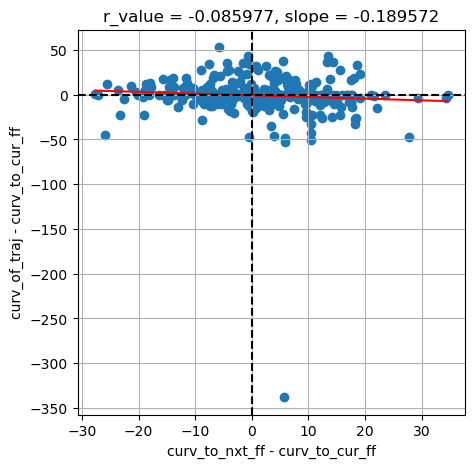

In [3]:
normalize = False
eliminate_outliers = False
use_curv_to_ff_center = False
curv_of_traj_mode = 'distance'
window_for_curv_of_traj=[-25, 25]
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0328"

#data_item_info = find_stops_near_ff_utils.extract_key_info_from_data_item_for_stops_near_ff_class(data_item)

snf = stops_near_ff_based_on_ref_class.StopsNearFFBasedOnRef(raw_data_folder_path=raw_data_folder_path)
snf.get_more_monkey_data()
snf.traj_curv_descr = 'Traj Curv: From Current Point to Right Before Stop'



snf.streamline_organizing_info(ref_point_mode='distance', ref_point_value=-150, 
                              #ref_point_mode='time after cur ff visible', ref_point_value=0.1, 
                               curv_of_traj_mode=curv_of_traj_mode, window_for_curv_of_traj=window_for_curv_of_traj, truncate_curv_of_traj_by_time_of_capture=True,
                               use_curv_to_ff_center=use_curv_to_ff_center,  eliminate_outliers=eliminate_outliers,
                               stops_near_ff_df_exists_ok=True)

snf.ax_for_corr = snf.find_relationships_from_info(normalize=normalize, show_plot=True)
snf.prepare_to_plot_stops_near_ff()

In [4]:
# debug
snf.prepare_to_plot_stops_near_ff()

## visualize

### matplotlib

In [5]:
current_i = 0

diff_in_abs: 30.21957792483941
nxt_ff_index: 4
cur_ff_index: 3
duration after eliminating unnecessary parts:  [27.412363, 33.201428]
duration_to_plot: [27.412363, 33.201428]
currentTrial: 4 num_trials: 3
shown_ff_indices:  []


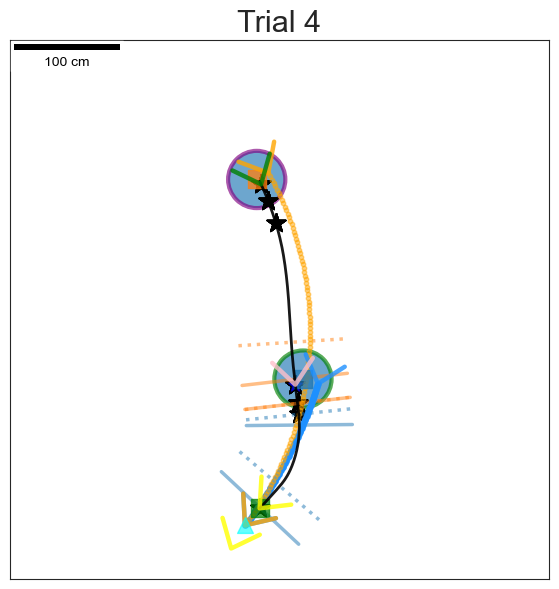

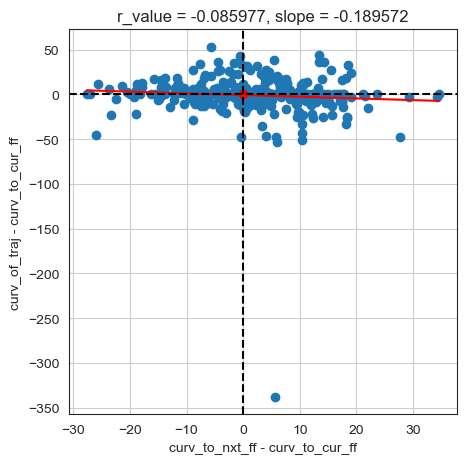

In [6]:
current_i = snf.make_individual_plots_for_stops_near_ff_in_mpl(current_i, max_num_plot_to_make = 1)

### show eye positions

In [7]:
current_i = 10

diff_in_abs: 19.20665947035737
nxt_ff_index: 28
cur_ff_index: 27
duration after eliminating unnecessary parts:  [83.021626, 87.731384]
duration_to_plot: [83.021626, 87.731384]
currentTrial: 28 num_trials: 2
shown_ff_indices:  []


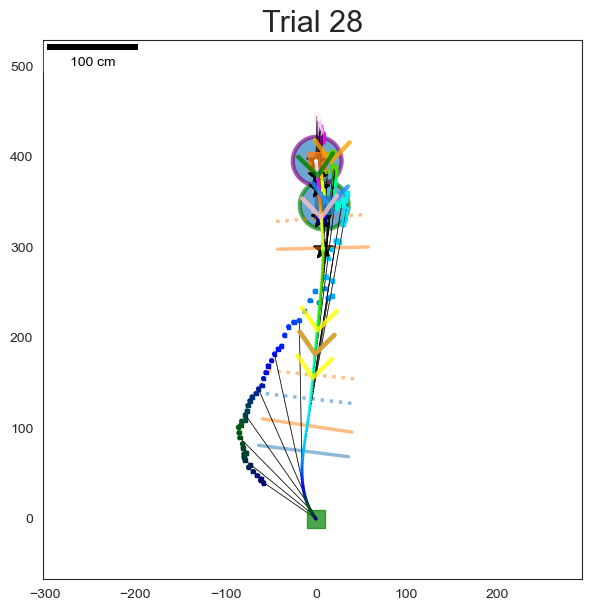

diff_in_abs: 10.526797464311556
nxt_ff_index: 32
cur_ff_index: 31
duration after eliminating unnecessary parts:  [87.155051, 91.648926]
duration_to_plot: [87.155051, 91.648926]
currentTrial: 32 num_trials: 5
shown_ff_indices:  []


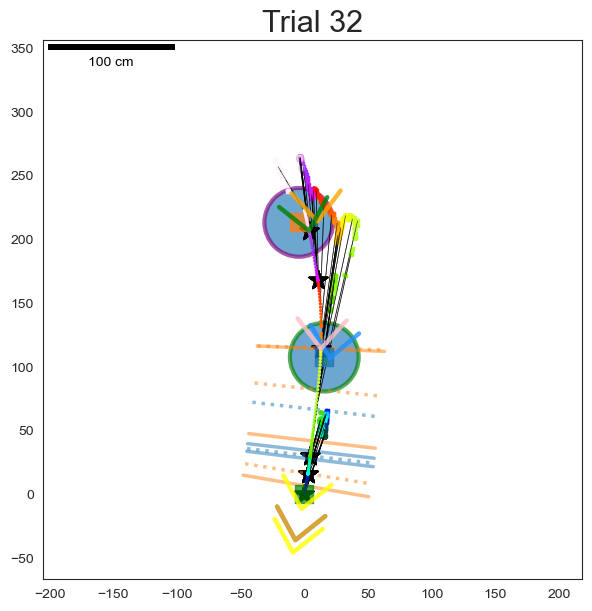

diff_in_abs: -8.38591967704107
nxt_ff_index: 33
cur_ff_index: 32
duration after eliminating unnecessary parts:  [88.648926, 94.603656]
duration_to_plot: [88.648926, 94.603656]
currentTrial: 33 num_trials: 4
shown_ff_indices:  []


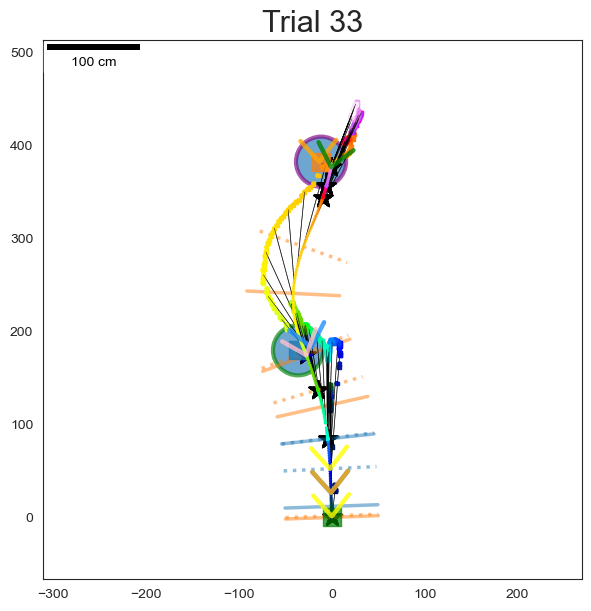

In [8]:
additional_plotting_kwargs={'show_connect_path_ff_specific_indices': None, 'show_ff_indices': True,
                            'show_eye_positions':True,
                            'show_eye_positions_for_both_eyes':True,
                            'show_connect_path_eye_positions': True}
current_i = snf.make_individual_plots_for_stops_near_ff_in_mpl(current_i, max_num_plot_to_make=3, 
                                      additional_plotting_kwargs=additional_plotting_kwargs,
                                      show_position_in_scatter_plot=False)

### plotly

In [9]:
snf.prepare_to_plot_stops_near_ff()

In [10]:
current_i = 2
snf.make_PlotTrials_args()

In [11]:
current_i = snf.make_individual_plots_for_stops_near_ff_in_plotly(current_i, max_num_plot_to_make=1, 
                                             show_eye_positions_for_both_eyes=True)

diff_in_abs: 2.663459033810417
duration_to_plot: [35.822656, 42.866437]


# Dash

## main

In [12]:
gc.collect()

27596

In [13]:
raw_data_folder_path = 'all_monkey_data/raw_monkey_data/monkey_Bruno/data_0326'

In [60]:
test_or_control='test'


ref_point_params = {'ref_point_mode': 'time after cur ff visible',
                    'ref_point_value': 0}


curv_of_traj_params = {'curv_of_traj_mode': 'distance',
                        'window_for_curv_of_traj': [-25, 25],
                        'truncate_curv_of_traj_by_time_of_capture': False}


overall_params = {'eliminate_outliers': True,
                  'use_curv_to_ff_center': False,
                  'normalize': False,
                  'remove_i_o_modify_rows_with_big_ff_angles': True,
                  'change_units_to_degrees_per_m': True,
                  'heading_instead_of_curv': True}  


scatter_plot_params = {
    "use_two_y_axes": False,
    "show_nxt_ff_curv_in_scatterplot": True,
    "show_cur_ff_curv_in_scatterplot": True,
}

monkey_plot_params = {
    "show_visible_fireflies": True,
    "show_in_memory_fireflies": False,
    "show_monkey_heading": False,
    "show_visible_segments": True,
    "show_traj_portion": True,
    "show_null_arcs_to_ff": True,
    "show_stops": True,
    "show_all_eye_positions": False,
    "show_current_eye_positions": True,
    "show_eye_positions_for_both_eyes": True,
}
     
#data_item_info = find_stops_near_ff_utils.extract_key_info_from_data_item_for_stops_near_ff_class(data_item)                       
dc = dash_main_class.DashMainPlots(raw_data_folder_path=raw_data_folder_path)


dc.prepare_to_make_dash_for_main_plots(monkey_plot_params=monkey_plot_params,
                                        scatter_plot_params=scatter_plot_params,
                                        ref_point_params=ref_point_params,
                                        curv_of_traj_params=curv_of_traj_params,
                                        overall_params=overall_params,
                                        stops_near_ff_df_exists_ok=True,
                                        test_or_control=test_or_control)




Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Removed 0 rows out of 580 rows where cur_ff was not visible bbas or nxt_ff was not visible both bbas and bsans
shared_stops_near_ff_df has 580 rows
Retrieving shared_stops_near_ff_df succeeded
Will make new heading_info_df because heading_info_df_exists_ok is False
Stored new heading_info_df (Bruno_stop_0) (288 rows) in all_monkey_data/planning/monkey_Bruno/data_0326/heading_info_df/norm_opt_arc/test/Bruno_stop_0
Retrieving stop_0_window_-50cm_0cm from all_monkey_data/planning/monkey_Bruno/data_0326/diff_in_curv_df/norm_opt_arc/test/stop_0_window_-50cm_0cm succeeded
Retrieved ff_dataframe from all_monkey_data/processed_data/monkey_Bruno/data_0326/ff_dataframe.h5
duration_to_plot: [25.696166, 32.374741]
Number of unique ff in the dropped rows: 1
Number of unique ff in the dropped rows: 1


In [20]:
# dc.fig.show()
# dc.fig_scatter_combd.show()

In [21]:
gc.collect()

14305

### dash

In [23]:
import ipdb
%pdb on

Automatic pdb calling has been turned ON


In [61]:
dc.make_dash_for_main_plots(show_trajectory_scatter_plot=True, show_shuffled_correlation_plot=False) 

duration_to_plot: [57.268774, 63.831197]
Number of unique ff in the dropped rows: 1
Number of unique ff in the dropped rows: 1


### clean up

In [26]:
# dc.app.server.shutdown()

In [27]:
import gc

# Now we're done with the data, so we can delete it and run the garbage collector.
del dc.app
gc.collect()

702

### more fig

In [28]:
for index, row in dc.stops_near_ff_df_counted.iterrows():
    dc.stops_near_ff_row = row
    dc.stop_point_index = row.stop_point_index
    dc._prepare_to_make_plotly_fig_for_dash_given_stop_point_index(dc.stop_point_index)
    dc.fig = dc._produce_fig_for_dash()
    dc.fig.show()

    if index == 2:
        break


duration_to_plot: [25.696166, 32.374741]
Number of unique ff in the dropped rows: 1
Number of unique ff in the dropped rows: 1


duration_to_plot: [26.874741, 34.38332]
Number of unique ff in the dropped rows: 1
Number of unique ff in the dropped rows: 1


duration_to_plot: [47.79038, 57.008706]
Number of unique ff in the dropped rows: 1
Number of unique ff in the dropped rows: 1


# Scatterplot for heading_info_df

Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Retrieved ff_dataframe from all_monkey_data/processed_data/monkey_Bruno/data_0326/ff_dataframe.h5
Removed 0 rows out of 580 rows where cur_ff was not visible bbas or nxt_ff was not visible both bbas and bsans
shared_stops_near_ff_df has 580 rows
Retrieving shared_stops_near_ff_df succeeded
Retrieving dist_-150_window_-50cm_0cm from all_monkey_data/planning/monkey_Bruno/data_0326/diff_in_curv_df/norm_opt_arc/test/dist_-150_window_-50cm_0cm succeeded
Retrieving Bruno_dist_150 from all_monkey_data/planning/monkey_Bruno/data_0326/heading_info_df/norm_opt_arc/test/Bruno_dist_150 succeeded


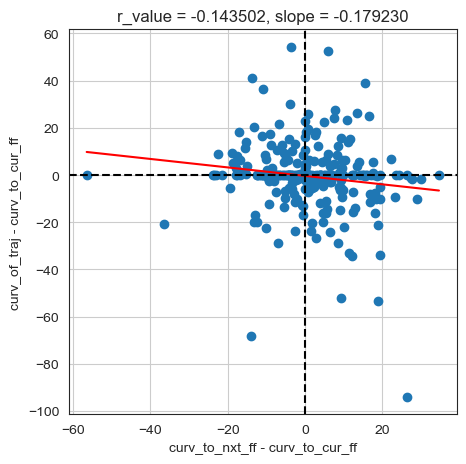

In [37]:
normalize = False
eliminate_outliers = False
use_curv_to_ff_center = False

# oh...curv_of_traj doesn't matter if we're only looking at heading. 
# but we can def play around with the hyperparameters for ref_point
curv_of_traj_mode = 'specific index'
curv_of_traj_mode = 'distance'
window_for_curv_of_traj = [-25, 25]

# data_item_info = find_stops_near_ff_utils.extract_key_info_from_data_item_for_stops_near_ff_class(data_item)

snf = stops_near_ff_based_on_ref_class.StopsNearFFBasedOnRef(raw_data_folder_path=raw_data_folder_path)
snf.get_more_monkey_data()
snf.traj_curv_descr = 'Traj Curv: From Current Point to Right Before Stop'

snf.streamline_organizing_info(ref_point_mode='distance', ref_point_value=-150, 
                               curv_of_traj_mode=curv_of_traj_mode, window_for_curv_of_traj=window_for_curv_of_traj,
                               truncate_curv_of_traj_by_time_of_capture=False,
                               use_curv_to_ff_center=use_curv_to_ff_center,  eliminate_outliers=eliminate_outliers)
snf.ax_for_corr = snf.find_relationships_from_info(normalize=normalize, show_plot=True)
#snf.get_null_arc_info_for_counted_points(use_fixed_arc_length=False)

## normal

In [38]:
snf._make_cur_and_nxt_ff_df()
snf._make_heading_info_df()

Retrieving dist_-150_window_-50cm_0cm from all_monkey_data/planning/monkey_Bruno/data_0326/diff_in_curv_df/norm_opt_arc/test/dist_-150_window_-50cm_0cm succeeded
Retrieving Bruno_dist_150 from all_monkey_data/planning/monkey_Bruno/data_0326/heading_info_df/norm_opt_arc/test/Bruno_dist_150 succeeded


(     Unnamed: 0_x  stop_point_index    stop_x     stop_y  stop_time  \
 0               0              1784 646.73352  561.86316   29.69617   
 1               1              1857 589.60577  608.41156   30.87474   
 2               2              3124 296.10721 -375.72458   51.79038   
 3               3              3350 273.02200    4.41612   55.50871   
 4               4              3482 329.32230  240.02983   57.66665   
 ..            ...               ...       ...        ...        ...   
 289           289            147686 317.52734  260.39819 2426.19318   
 290           290            149898 112.79991  517.39941 2462.61296   
 291           291            150873 573.94019  225.69766 2478.68135   
 292           292            151038 307.74939  255.40907 2481.38720   
 293           293            212684 370.35614 -213.04271 3504.25994   
 
      cur_ff_index  cur_ff_x   cur_ff_y  cur_ff_cluster_50_size  \
 0               1 656.16354  568.23995                       1   


In [39]:
ang_traj_nxt, ang_cur_nxt, heading_info_df_no_na = show_planning_utils.get_ang_traj_nxt_and_ang_cur_nxt(snf.heading_info_df.copy())

Number of rows with NaN values in heading_info_df: 84 out of 294 rows, but they are not dropped. The columns with NaN values are:
NXT_time_ff_last_seen_bsans             58
nxt_ff_last_flash_time_bsans            54
nxt_ff_cluster_last_seen_time_bsans     46
nxt_ff_cluster_last_flash_time_bsans    40
Unnamed: 0_y                             7
opt_arc_curv_from_m_before_stop_to_nxt                    9
curv_of_traj_in_window_to_cur_ff                    9
opt_arc_curv_from_cur_end_to_nxt                 28
opt_arc_curv_to_cur_ff                 28
d_curv_null_arc                         28
d_curv_monkey                            9
abs_d_curv_null_arc                     28
abs_d_curv_monkey                        9
diff_in_curv_to_cur_ff                    30
diff_in_curv_to_nxt_ff                     30
diff_in_d_curv                          30
diff_in_abs_d_curv                      30
dtype: int64


In [40]:
# ang_traj_nxt, ang_cur_nxt, heading_info_df_no_na = show_planning_utils.get_ang_traj_nxt_and_ang_cur_nxt(dsp.combd_heading_df_x_sessions.copy())

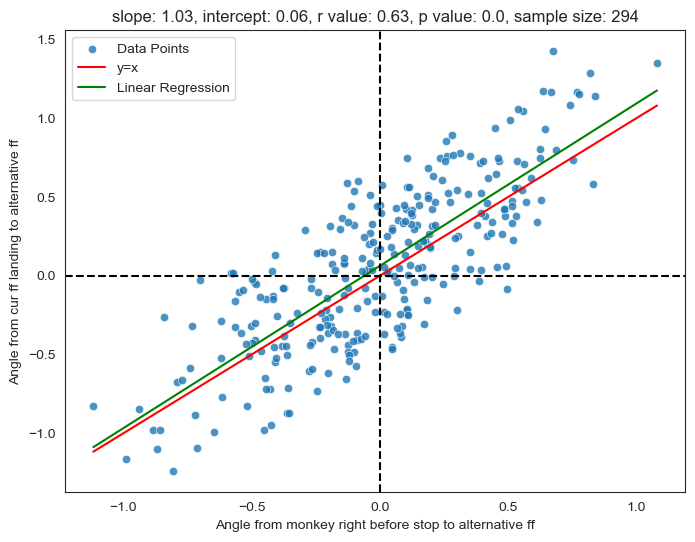

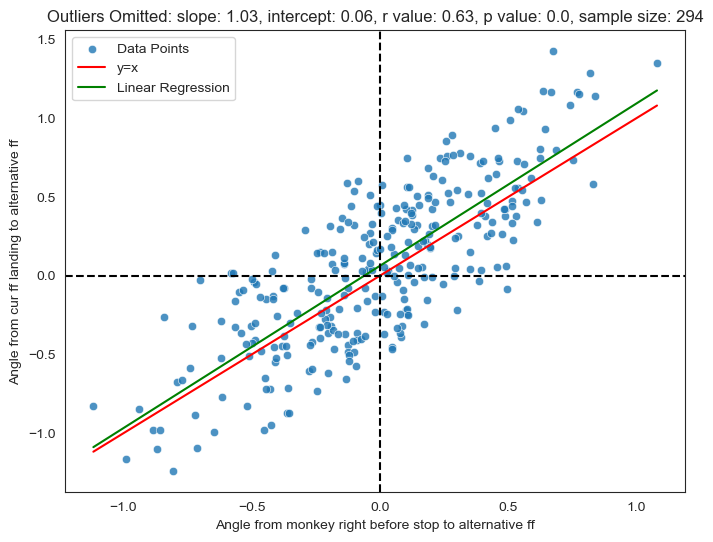

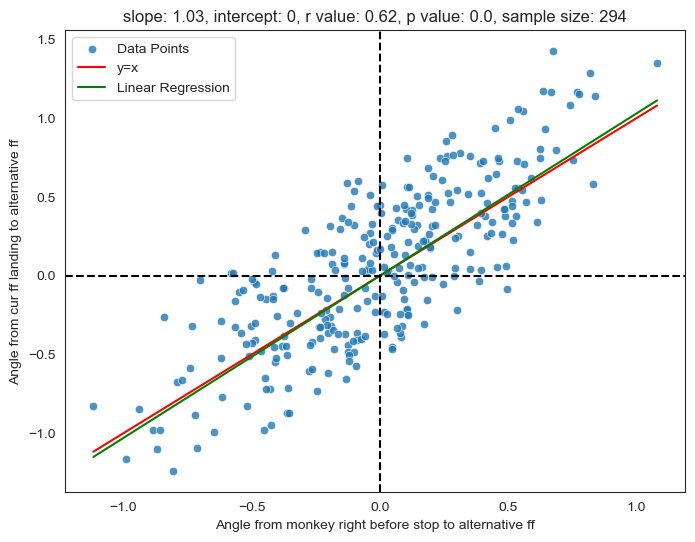

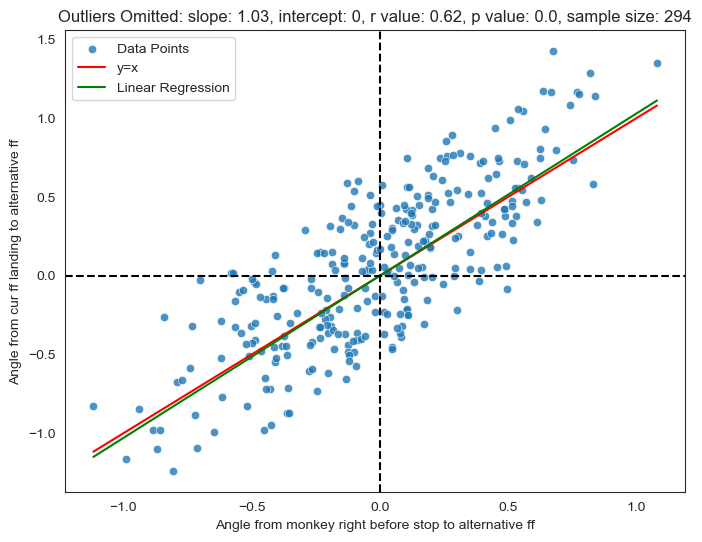

In [41]:
slope, intercept, r_value, p_value, results = show_planning_utils.conduct_linear_regression_to_show_planning(ang_traj_nxt, ang_cur_nxt, fit_intercept=True)
slope, intercept, r_value, p_value, results = show_planning_utils.conduct_linear_regression_to_show_planning(ang_traj_nxt, ang_cur_nxt, fit_intercept=True, omit_outliers=True)
slope, intercept, r_value, p_value, results = show_planning_utils.conduct_linear_regression_to_show_planning(ang_traj_nxt, ang_cur_nxt, fit_intercept=False)
slope, intercept, r_value, p_value, results = show_planning_utils.conduct_linear_regression_to_show_planning(ang_traj_nxt, ang_cur_nxt, fit_intercept=False, omit_outliers=True)

## Q13 only

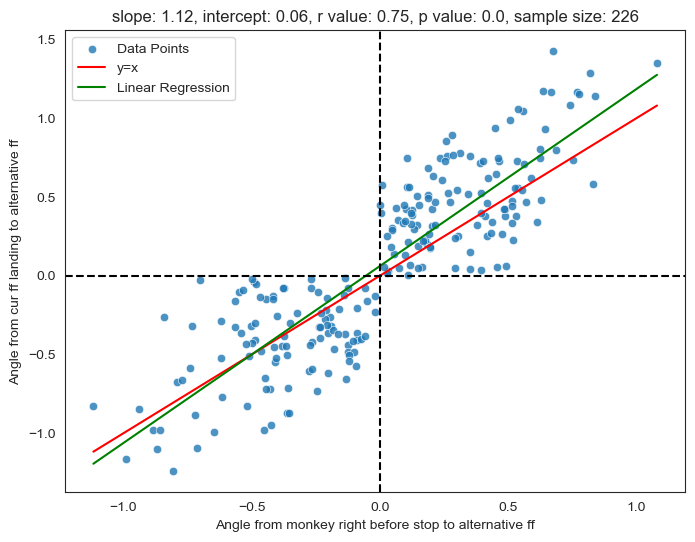

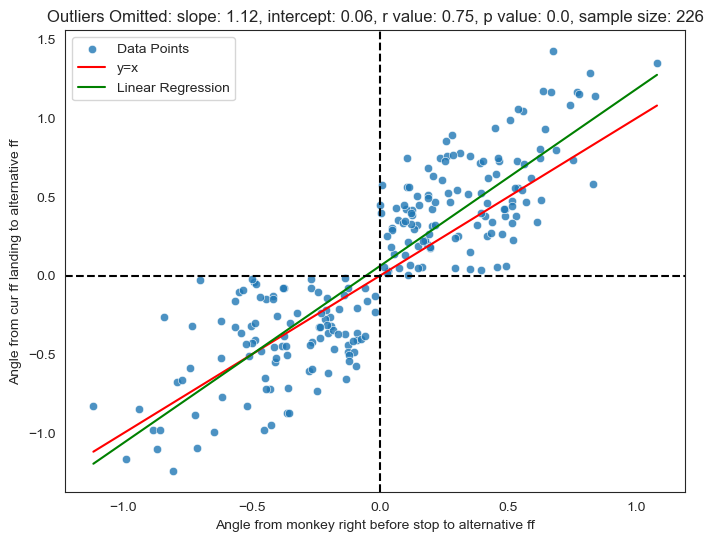

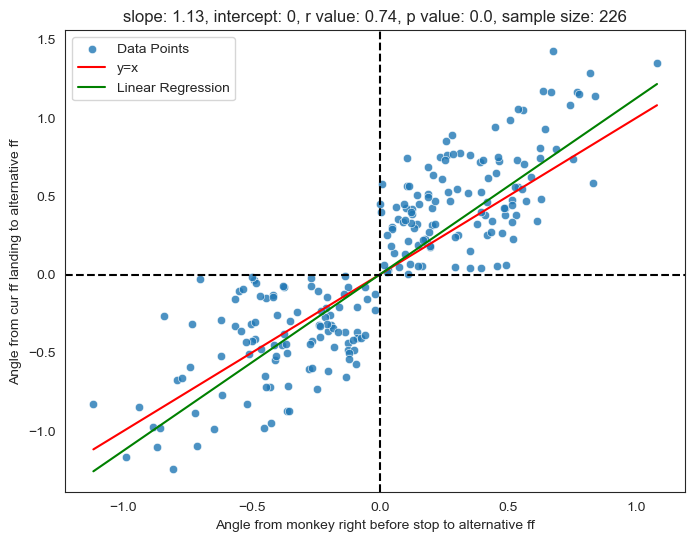

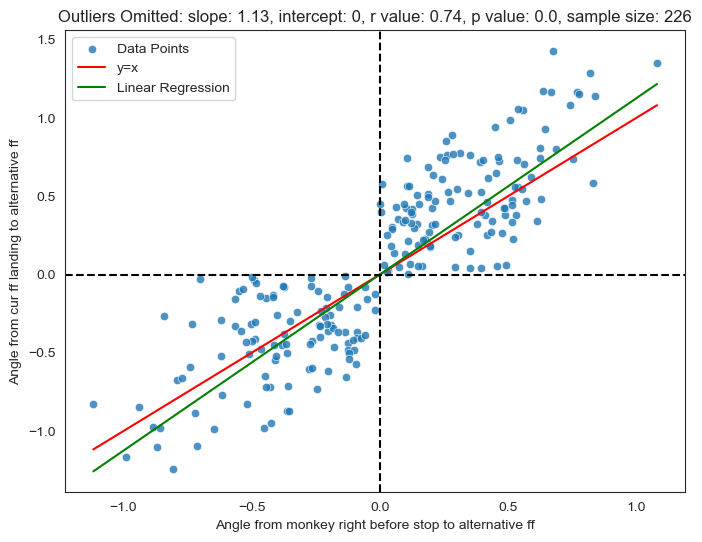

In [42]:
slope, intercept, r_value, p_value, results = show_planning_utils.conduct_linear_regression_to_show_planning(ang_traj_nxt, ang_cur_nxt, q13_only=True, fit_intercept=True)
slope, intercept, r_value, p_value, results = show_planning_utils.conduct_linear_regression_to_show_planning(ang_traj_nxt, ang_cur_nxt, q13_only=True, fit_intercept=True, omit_outliers=True)
slope, intercept, r_value, p_value, results = show_planning_utils.conduct_linear_regression_to_show_planning(ang_traj_nxt, ang_cur_nxt, q13_only=True, fit_intercept=False)
slope, intercept, r_value, p_value, results = show_planning_utils.conduct_linear_regression_to_show_planning(ang_traj_nxt, ang_cur_nxt, q13_only=True, fit_intercept=False, omit_outliers=True)

## Abs value

In [ ]:
slope, intercept, r_value, p_value, results = show_planning_utils.conduct_linear_regression_to_show_planning(ang_traj_nxt, ang_cur_nxt, use_abs_values=True, fit_intercept=True)
slope, intercept, r_value, p_value, results = show_planning_utils.conduct_linear_regression_to_show_planning(ang_traj_nxt, ang_cur_nxt, use_abs_values=True, fit_intercept=True, omit_outliers=True)
slope, intercept, r_value, p_value, results = show_planning_utils.conduct_linear_regression_to_show_planning(ang_traj_nxt, ang_cur_nxt, use_abs_values=True, fit_intercept=False)
slope, intercept, r_value, p_value, results = show_planning_utils.conduct_linear_regression_to_show_planning(ang_traj_nxt, ang_cur_nxt, use_abs_values=True, fit_intercept=False, omit_outliers=True)

# Diff in distance (compare test and ctrl)

In [ ]:
dc.stops_near_ff_df['d_from_cur_ff_to_nxt_ff'].max()

476.5789842245237

In [ ]:
dc.make_stops_near_ff_df_test(exists_ok=True)
dc.make_stops_near_ff_df_ctrl(exists_ok=True)

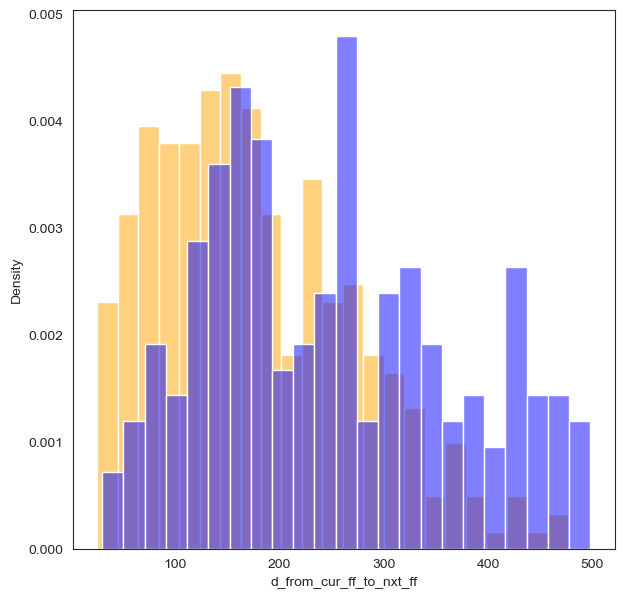

In [ ]:
sns.histplot(dc.stops_near_ff_df_test['d_from_cur_ff_to_nxt_ff'], binwidth=20, stat='density', alpha=0.5, color='orange')
sns.histplot(dc.stops_near_ff_df_ctrl['d_from_cur_ff_to_nxt_ff'], binwidth=20, stat='density', alpha=0.5, color='blue')
plt.show()


# Appendix

## check eye position distribution

Check to see that "apply_formulas_to_convert_eye_position_to_ff_position" is correct: expect to see a straight line of y=x in the scatter plot

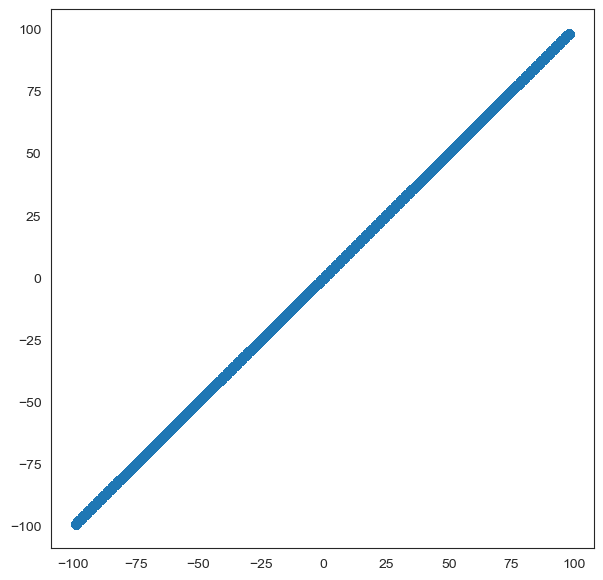

In [ ]:
from numpy import linalg as LA

monkey_height = -10

values = np.arange(-99, 99, 1)

gaze_world_x = np.repeat(values, len(values))
gaze_world_y = np.repeat(values.reshape([1, -1]), len(values), axis=0).reshape(-1)


body_theta = np.random.uniform(-pi, pi, len(gaze_world_x))
body_x = np.random.uniform(-100, 100, len(gaze_world_x))
body_y = np.random.uniform(-100, 100, len(gaze_world_x))


gaze_mky_view_x = gaze_world_x - body_x
gaze_mky_view_y = gaze_world_y - body_y
gaze_mky_view_xy = np.stack((gaze_mky_view_x, gaze_mky_view_y), axis=1)
gaze_mky_view_r = LA.norm(gaze_mky_view_xy, axis=1)

theta_to_north = np.arctan((gaze_world_x - body_x) / np.sqrt(monkey_height**2 + (gaze_world_y-body_y)**2))
to_adjust = np.where(gaze_mky_view_y < 0)[0]
# 
theta_to_north[to_adjust] = np.sign(theta_to_north[to_adjust]) * (pi - np.abs(theta_to_north[to_adjust]))


hor_theta = theta_to_north
ver_theta = np.arctan(monkey_height / gaze_mky_view_r)

gaze_mky_view_x_recovered, gaze_mky_view_y_recovered, _, gaze_world_x_recovered, gaze_world_y_recovered \
    = eye_positions.apply_formulas_to_convert_eye_position_to_ff_position(hor_theta, ver_theta, body_theta, monkey_height, body_x, body_y,
                        interocular_dist=0, rotate_world_xy_based_on_m_angle_to_get_abs_coord=False)

plt.scatter(gaze_world_x, gaze_world_x_recovered)
plt.show()

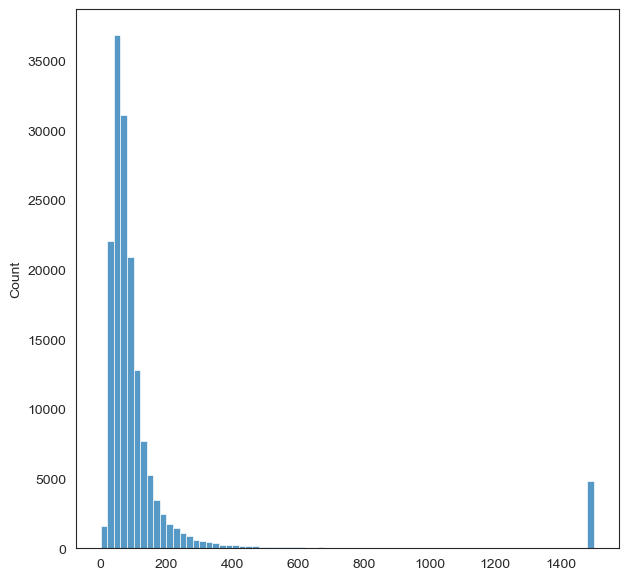

In [ ]:
gaze_mky_view_y = dc.monkey_information['gaze_mky_view_y'].values
gaze_mky_view_y[gaze_mky_view_y < 0] = 0
gaze_mky_view_y[gaze_mky_view_y > 1500] = 1500
sns.histplot(gaze_mky_view_y, binwidth=20)
plt.show()


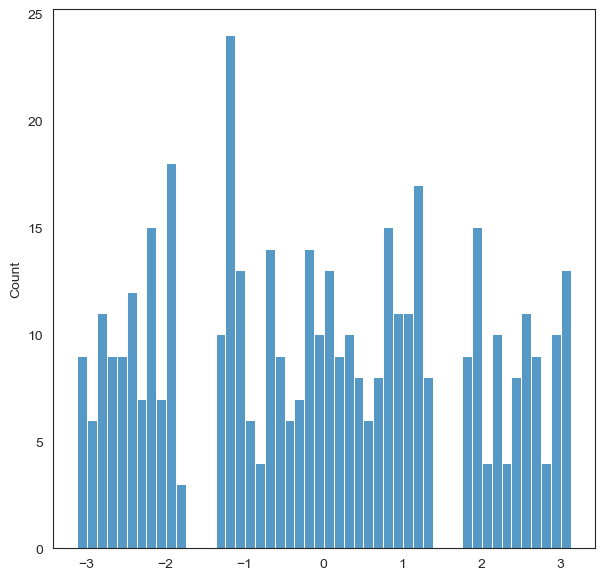

In [ ]:
sns.histplot(theta_to_north[np.where(np.abs(ver_theta + 0.29414615) < 0.01 )], bins=50)
plt.show()

In [ ]:
ab = theta_to_north[np.where(np.abs(ver_theta + 0.29414615) < 0.01 )]
max(ab[ab < 1.57])

1.286429424076382

In [ ]:
ab = theta_to_north[np.where(np.abs(ver_theta + 0.29414615) < 0.01 )]
min(ab[ab > 1.57])

1.8639447517935266

## does monkey under-turn?

This section analyzes whether the monkey's trajectory exhibits an under-turn or over-turn behavior when navigating between fireflies. This analysis examines the relationship between the monkey's actual trajectory heading and the optimal arc heading that would lead directly to the current firefly.

When the monkey's trajectory's change in heading is less than the optimal arc's change in heading (turning less than needed to reach the target firefly)

In [44]:
# for 4 ff
ref_point_mode = 'distance'
ref_point_value = -150

ps = monkey_plan_factors_x_sess_class.PlanAcrossSessions()
ps.initialize_monkey_sessions_df_for_one_monkey()
ps.get_combd_heading_df_x_sessions_across_sessions(
                        ref_point_mode=ref_point_mode, 
                        ref_point_value=ref_point_value,
                        save_data=True)


Successfully retrieved combd_heading_df_x_sessions from:  all_monkey_data/planning/monkey_Bruno/combined_data/cur_and_nxt/data/combd_heading_info/norm_opt_arc/control/Bruno_dist_150
Successfully retrieved combd_diff_in_curv_df from:  all_monkey_data/planning/monkey_Bruno/combined_data/cur_and_nxt/data/combd_diff_in_curv/norm_opt_arc/control/dist_-150_window_-50cm_0cm
Successfully retrieved combd_heading_df_x_sessions from:  all_monkey_data/planning/monkey_Bruno/combined_data/cur_and_nxt/data/combd_heading_info/norm_opt_arc/test/Bruno_dist_150
Successfully retrieved combd_diff_in_curv_df from:  all_monkey_data/planning/monkey_Bruno/combined_data/cur_and_nxt/data/combd_diff_in_curv/norm_opt_arc/test/dist_-150_window_-50cm_0cm


In [45]:
# control
(180/math.pi * (np.abs(ps.combd_heading_df_x_sessions_ctrl['cur_d_heading_of_arc']) 
                - np.abs(ps.combd_heading_df_x_sessions_ctrl['d_heading_of_traj']))).describe()

count   4927.00000
mean       0.57680
std       13.29561
min      -82.65194
25%       -8.74383
50%       -1.09554
75%        9.46314
max       51.61709
dtype: float64

In [46]:
# test
(180/math.pi * (np.abs(ps.combd_heading_df_x_sessions_test['cur_d_heading_of_arc']) 
                - np.abs(ps.combd_heading_df_x_sessions_test['d_heading_of_traj']))).describe()

count   7982.00000
mean       0.75926
std       13.20894
min      -45.67153
25%       -8.74273
50%       -0.89108
75%       10.03544
max       59.68408
dtype: float64

In [47]:
(180/math.pi * ps.combd_heading_df_x_sessions_test[['cur_d_heading_of_arc', 'd_heading_of_traj']]).describe()

,cur_d_heading_of_arc,d_heading_of_traj
count,7982.00000,7982.00000
mean,3.23280,7.26384
std,25.68142,22.59799
min,-88.07389,-72.62517
25%,-12.11186,-4.81363
50%,1.27668,9.21339
75%,20.58950,20.84355
max,84.06070,75.89000


In [48]:
# use absolute value of heading difference
(180/math.pi * np.abs(ps.combd_heading_df_x_sessions_test[['cur_d_heading_of_arc', 'd_heading_of_traj']])).describe()

,cur_d_heading_of_arc,d_heading_of_traj
count,7982.00000,7982.00000
mean,19.73276,18.97350
std,16.74983,14.26185
min,0.00001,0.00129
25%,5.38871,7.79696
50%,16.85229,15.87856
75%,30.18031,27.19386
max,88.07389,75.89000


In [49]:
# see the summary of the difference between the absolute value of the heading difference of the current arc and the heading difference of the trajectory
(180/math.pi * (np.abs(ps.combd_heading_df_x_sessions_test['cur_d_heading_of_arc']) - np.abs(ps.combd_heading_df_x_sessions_test['d_heading_of_traj']))).describe()

count   7982.00000
mean       0.75926
std       13.20894
min      -45.67153
25%       -8.74273
50%       -0.89108
75%       10.03544
max       59.68408
dtype: float64

In [51]:
num_rows_mismatched_signs = np.abs((np.sign(ps.combd_heading_df_x_sessions_test['cur_d_heading_of_arc']) - np.sign(ps.combd_heading_df_x_sessions_test['d_heading_of_traj']))).sum()/2
num_rows_mismatched_signs

1051.0

In [52]:
num_rows_mismatched_signs/len(ps.combd_heading_df_x_sessions_test)

0.13167126033575546

## Monkey Bruno prefers to turn left

In [53]:
monkey_dw = dc.monkey_information['monkey_dw'].values

In [54]:
monkey_dw = monkey_dw*180/math.pi

In [55]:
(180/math.pi * dc.monkey_information['monkey_dw']).describe()

count   218391.00000
mean         4.46137
std         76.23459
min     -10776.34222
25%          0.00000
50%          0.00000
75%         10.77835
max      10675.81182
Name: monkey_dw, dtype: float64

In [56]:
monkey_dw_sub = monkey_dw[np.abs(monkey_dw) < 20]

In [57]:
len(monkey_dw_sub)/len(monkey_dw)

0.7171312004615574

In [58]:
np.sum(monkey_dw)/360

2706.450893262235

In [59]:
# how many 360 circles did the monkey make?
np.sum(monkey_dw_sub)/360

468.2042471145568

## Check run time

import cProfile
cProfile.run('snf.streamline_organizing_info()', sort='cumtime')